In [1]:
import pandas as pd 
import seaborn as sns

In [2]:
data = pd.read_csv('Mortality_Rate_Data.csv')

In [3]:
data_tx = data[data["State"] == 'Texas']

### plotting for texas

In [4]:
texas_wide = data_tx.pivot(index="Year", columns="CTYNAME", values="Mortality_Rate")

<Axes: xlabel='Year'>

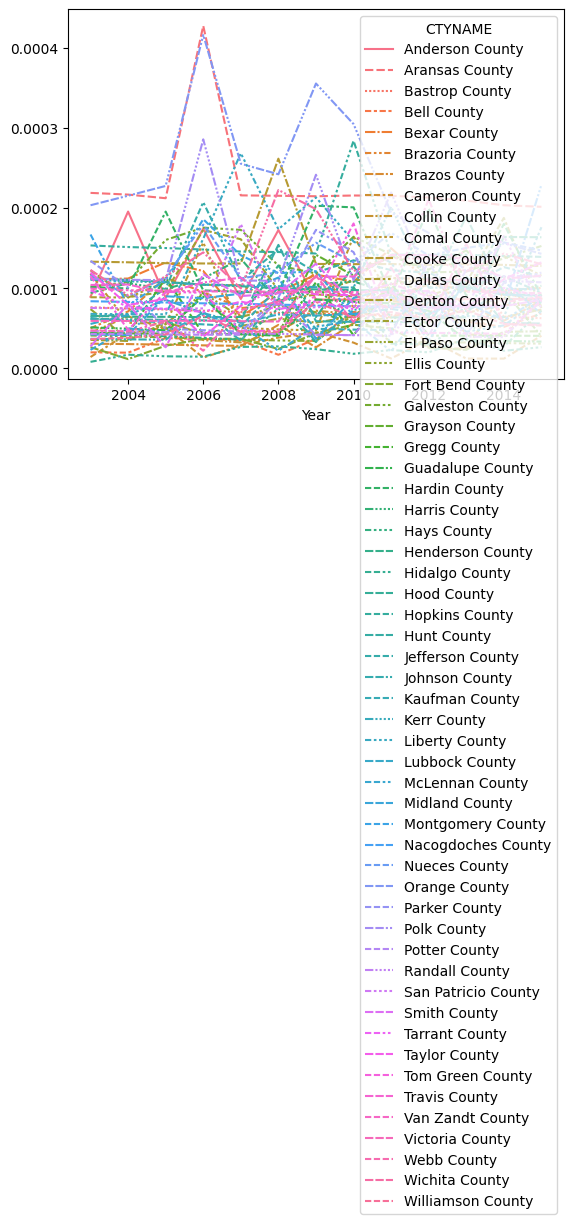

In [5]:
sns.lineplot(data=texas_wide)

<Axes: xlabel='Year', ylabel='Mortality_Rate'>

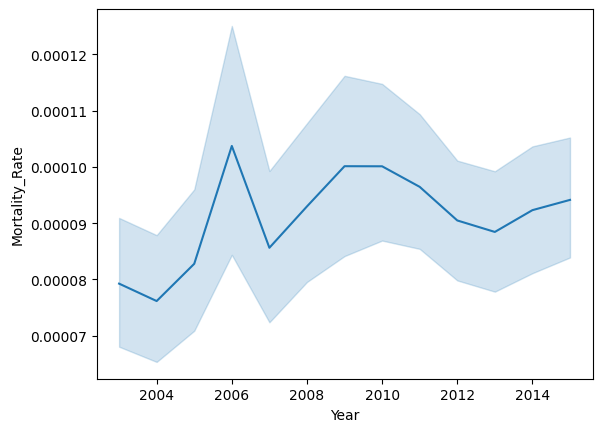

In [6]:
sns.lineplot(data=data_tx, x="Year", y="Mortality_Rate")


### Pre post analysis for Florida 

In [7]:
data_fl = data[data["State"] == 'Florida']

##### policy change in 2010

### Aggregate at state level - single point for each year

In [8]:
data_fl['Agg'] = data_fl.groupby(['State','Year'])['Mortality_Rate'].transform('mean')


/tmp/ipykernel_1546/2982374715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fl['Agg'] = data_fl.groupby(['State','Year'])['Mortality_Rate'].transform('mean')


In [9]:
data_fl = data_fl[['State','Year','Agg']].drop_duplicates() 

In [10]:
fl_pre = data_fl[data_fl['Year'] < 2010]

In [11]:
fl_post = data_fl[data_fl['Year'] >= 2010]

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

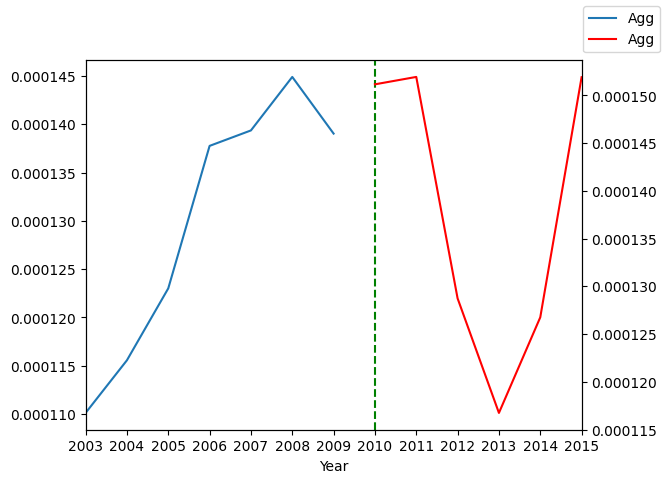

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Assuming you have already defined fl_pre and fl_post DataFrames

# Plotting the first set of data
ax = fl_pre.plot(x="Year", y="Agg", legend=False)
ax2 = ax.twinx()
fl_post.plot(x="Year", y="Agg", ax=ax2, legend=False, color="r")

# Adding a vertical line at year 2010
ax.axvline(x=2010, color='g', linestyle='--') 

min_year = min(fl_pre['Year'].min(), fl_post['Year'].min())
max_year = max(fl_pre['Year'].max(), fl_post['Year'].max())
ax.set_xlim(min_year, max_year)

# Set x-axis ticks to display every year
ax.set_xticks(range(int(min_year), int(max_year) + 1))  # Set ticks for every year

ax.figure.legend()

# Show the plot
plt.show()


/tmp/ipykernel_1546/1601134542.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fl_pre['Data'] = 'Pre'
/tmp/ipykernel_1546/1601134542.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fl_post['Data'] = 'Post'


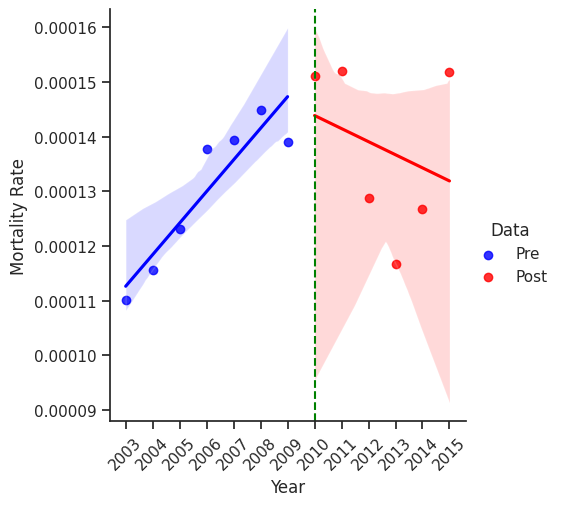

In [14]:
import seaborn as sns

# Assuming you have already defined fl_pre and fl_post DataFrames

# Merge the datasets for easier plotting
fl_pre['Data'] = 'Pre'
fl_post['Data'] = 'Post'
combined_data = pd.concat([fl_pre, fl_post])

# Plotting using Seaborn
sns.set(style="ticks")  # Setting the style to remove the gridlines

# Create the plot
plot = sns.lmplot(x="Year", y="Agg", data=combined_data, hue='Data', palette={"Pre": "blue", "Post": "red"})

# Accessing the underlying axes
ax = plot.axes[0, 0]

# Adding a vertical line at 2010
ax.axvline(x=2010, color='green', linestyle='--')

# Set x-axis ticks to display every year
ax.set_xticks(range(int(combined_data['Year'].min()), int(combined_data['Year'].max()) + 1))

# Rotate x-axis labels for better readability and increase space between them
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Mortality Rate")

# Show the plot
plt.show()


##### creating for washington

In [15]:
data_wa = data[data["State"] == 'Washington']
data_wa['Agg'] = data_wa.groupby(['State','Year'])['Mortality_Rate'].transform('mean')
data_wa = data_wa[['State','Year','Agg']].drop_duplicates() 
wa_pre = data_wa[data_wa['Year'] < 2012]
wa_post = data_wa[data_wa['Year'] >= 2012]

/tmp/ipykernel_1546/2511489478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wa['Agg'] = data_wa.groupby(['State','Year'])['Mortality_Rate'].transform('mean')


/tmp/ipykernel_1546/1635361992.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wa_pre['Data'] = 'Pre'
/tmp/ipykernel_1546/1635361992.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wa_post['Data'] = 'Post'


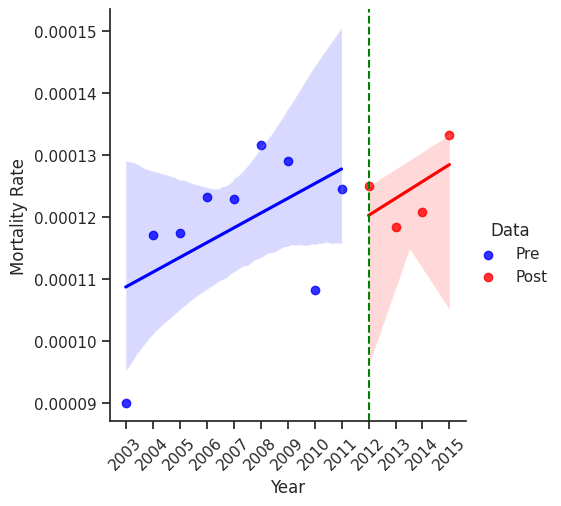

In [16]:
import seaborn as sns

# Assuming you have already defined fl_pre and fl_post DataFrames

# Merge the datasets for easier plotting
wa_pre['Data'] = 'Pre'
wa_post['Data'] = 'Post'
combined_data = pd.concat([wa_pre, wa_post])

# Plotting using Seaborn
sns.set(style="ticks")  # Setting the style to remove the gridlines

# Create the plot
plot = sns.lmplot(x="Year", y="Agg", data=combined_data, hue='Data', palette={"Pre": "blue", "Post": "red"})

# Accessing the underlying axes
ax = plot.axes[0, 0]

# Adding a vertical line at 2010
ax.axvline(x=2012, color='green', linestyle='--')

# Set x-axis ticks to display every year
ax.set_xticks(range(int(combined_data['Year'].min()), int(combined_data['Year'].max()) + 1))

# Rotate x-axis labels for better readability and increase space between them
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Mortality Rate")

# Show the plot
plt.show()

## Opioid per capita

In [17]:
opioid_data = pd.read_csv('county_mme_per_cap.csv')

In [18]:
opioid_data.head(10)

,Unnamed: 0,BUYER_COUNTY,BUYER_STATE,YEAR,MME,MME_Conversion_Factor,CALC_BASE_WT_IN_GM,STATE_ID,COUNTY_NAME,Population,MME_PER_CAP
0,0,ABBEVILLE,SC,2006,3.136215e+06,1023.0,2506.084390,SC,ABBEVILLE,25821.0,121.459873
1,1,ABBEVILLE,SC,2007,3.232603e+06,1088.0,2623.718375,SC,ABBEVILLE,25745.0,125.562362
2,2,ABBEVILLE,SC,2008,3.070698e+06,1000.5,2574.677256,SC,ABBEVILLE,25699.0,119.487044
3,3,ABBEVILLE,SC,2009,3.827607e+06,1075.0,3110.779538,SC,ABBEVILLE,25614.0,149.434179
4,4,ABBEVILLE,SC,2010,4.612935e+06,1374.5,3695.582848,SC,ABBEVILLE,25338.0,182.056003
5,5,ABBEVILLE,SC,2011,4.833266e+06,1568.5,3890.932455,SC,ABBEVILLE,25093.0,192.614116
6,6,ABBEVILLE,SC,2012,4.835180e+06,1759.0,3961.652980,SC,ABBEVILLE,25033.0,193.152246
7,7,ABBEVILLE,SC,2013,4.846713e+06,1846.5,3988.785070,SC,ABBEVILLE,24912.0,194.553354
8,8,ABBEVILLE,SC,2014,5.095216e+06,1839.5,4202.032980,SC,ABBEVILLE,24811.0,205.361168
9,9,ABBEVILLE,SC,2015,5.343645e+06,1962.5,4372.959850,SC,ABBEVILLE,24814.0,215.347998


## Filter for Fl and groupby at year level

In [19]:
opioid_data_fl = opioid_data[opioid_data["BUYER_STATE"] == 'FL']
opioid_data_fl['Agg'] = opioid_data_fl.groupby(['BUYER_STATE','YEAR'])['MME_PER_CAP'].transform('mean')
opioid_data_fl = opioid_data_fl[['BUYER_STATE','YEAR','Agg']].drop_duplicates() 
fl_pre = opioid_data_fl[opioid_data_fl['YEAR'] < 2010]
fl_post = opioid_data_fl[(opioid_data_fl['YEAR'] >= 2010) & (opioid_data_fl['YEAR'] <=2015)]

/tmp/ipykernel_1546/2370480470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opioid_data_fl['Agg'] = opioid_data_fl.groupby(['BUYER_STATE','YEAR'])['MME_PER_CAP'].transform('mean')


/tmp/ipykernel_1546/1184763025.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fl_pre['Data'] = 'Pre'
/tmp/ipykernel_1546/1184763025.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fl_post['Data'] = 'Post'


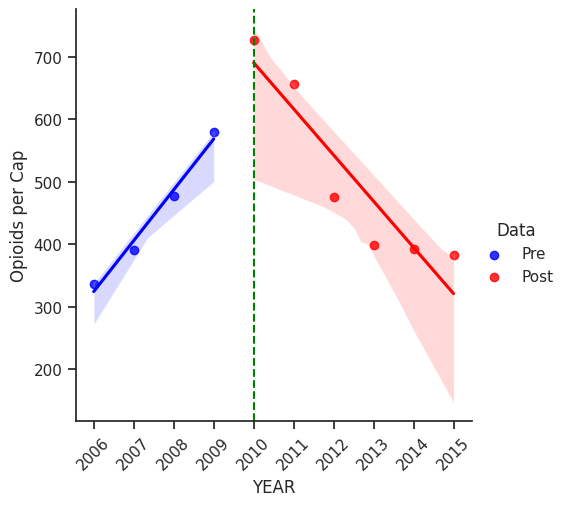

In [20]:
import seaborn as sns

# Assuming you have already defined fl_pre and fl_post DataFrames

# Merge the datasets for easier plotting
fl_pre['Data'] = 'Pre'
fl_post['Data'] = 'Post'
combined_data = pd.concat([fl_pre, fl_post])

# Plotting using Seaborn
sns.set(style="ticks")  # Setting the style to remove the gridlines

# Create the plot
plot = sns.lmplot(x="YEAR", y="Agg", data=combined_data, hue='Data', palette={"Pre": "blue", "Post": "red"})

# Accessing the underlying axes
ax = plot.axes[0, 0]

# Adding a vertical line at 2010
ax.axvline(x=2010, color='green', linestyle='--')

# Set x-axis ticks to display every year
ax.set_xticks(range(int(combined_data['YEAR'].min()), int(combined_data['YEAR'].max()) + 1))

# Rotate x-axis labels for better readability and increase space between them
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Opioids per Cap")

# Show the plot
plt.show()

### opioids for washington

In [25]:
opioid_data_wa = opioid_data[opioid_data["BUYER_STATE"] == 'WA']
opioid_data_wa['Agg'] = opioid_data_wa.groupby(['BUYER_STATE','YEAR'])['MME_PER_CAP'].transform('mean')
opioid_data_wa = opioid_data_wa[['BUYER_STATE','YEAR','Agg']].drop_duplicates() 
wa_pre = opioid_data_wa[opioid_data_wa['YEAR'] < 2012]
wa_post = opioid_data_wa[(opioid_data_wa['YEAR'] >= 2012) & (opioid_data_wa['YEAR'] <=2015)]

/tmp/ipykernel_1546/1793951907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opioid_data_wa['Agg'] = opioid_data_wa.groupby(['BUYER_STATE','YEAR'])['MME_PER_CAP'].transform('mean')


/tmp/ipykernel_1546/1514699403.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wa_pre['Data'] = 'Pre'
/tmp/ipykernel_1546/1514699403.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wa_post['Data'] = 'Post'


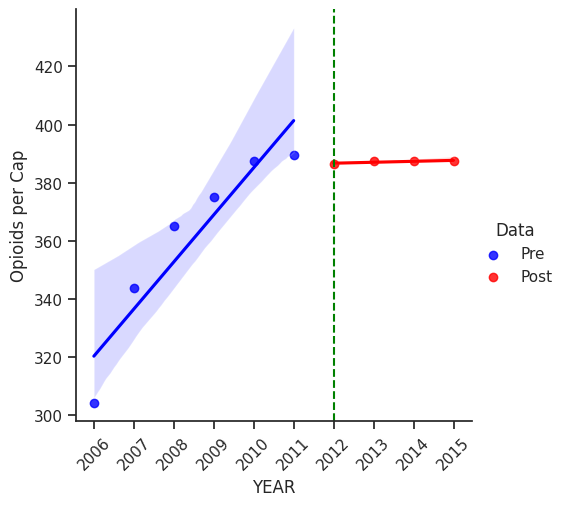

In [26]:
import seaborn as sns

# Assuming you have already defined fl_pre and fl_post DataFrames

# Merge the datasets for easier plotting
wa_pre['Data'] = 'Pre'
wa_post['Data'] = 'Post'
combined_data = pd.concat([wa_pre, wa_post])

# Plotting using Seaborn
sns.set(style="ticks")  # Setting the style to remove the gridlines

# Create the plot
plot = sns.lmplot(x="YEAR", y="Agg", data=combined_data, hue='Data', palette={"Pre": "blue", "Post": "red"})

# Accessing the underlying axes
ax = plot.axes[0, 0]

# Adding a vertical line at 2010
ax.axvline(x=2012, color='green', linestyle='--')

# Set x-axis ticks to display every year
ax.set_xticks(range(int(combined_data['YEAR'].min()), int(combined_data['YEAR'].max()) + 1))

# Rotate x-axis labels for better readability and increase space between them
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Opioids per Cap")

# Show the plot
plt.show()